In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
def pi(x, beta, clip_val=100):
    z = np.clip(np.dot(x, beta[1:])+beta[0], -clip_val, clip_val)
    return 1/(1 + np.exp(-z))
def h(X, beta, eps=1e-6):
    x = X[0]
    y = X[1]
    pi_vec = np.clip(pi(x, beta), eps, 1-eps)
    return -y@np.log(pi_vec) - (1-y)@np.log(1-pi_vec)
def grad_h(X, beta):
    x = X[0]
    y = X[1]
    pi_vec = pi(x, beta)
    diff = y - pi_vec
    return -np.concatenate(([np.sum(diff)], x.T@(diff)))

In [88]:
def error(X,beta):
    pi_vec = pi(X[0], beta)
    pi_vec = np.where(pi_vec <= 0.5, 0, 1)
    return np.mean(np.abs((pi_vec - X[1])))

In [ ]:
def steepest_descent(f, grad, beta, X, alpha=1e-4, tol=1e-6, maxiter=200):
    '''
        f: funcion a minimizar,
        grad: gradiente de la funcion a minimizar,
        beta: punto inicial,
        alpha: valor inicial del tamano de paso,
        tol: tolerancia,
        maxiter: maximo de iteraciones
    '''
    
    convergence = [[],[]]

    xk = beta # Punto inicial

    for k in range(maxiter):
        fk = f(X, xk)
        gk = grad(X, xk)
        g_norm = np.linalg.norm(gk)
        
        convergence[0].append(fk)
        convergence[1].append(np.abs(g_norm))
        
        # calculo de proxima iteracion de la solucion
        x = xk - alpha*gk
        if np.linalg.norm(grad(X, x)) < tol: # evaluacion de condicion de paro
            return x, convergence
        # actualizacion de funcion y punto propuesto
        prev_f = f(X, x)
        xk = x

    return xk, convergence

# Paso fijo

In [17]:
import gzip, pickle
with gzip.open('mnist.pkl.gz','rb') as ff :
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    train_set, val_set, test_set = u.load()

In [76]:
mask = np.isin(train_set[1], [0,1])
X = [train_set[0][mask], train_set[1][mask]]

In [115]:
np.random.seed(42)
idx = np.random.choice(np.arange(X[1].shape[0]), 1000, replace=False)
X_sample = [X[0][idx], X[1][idx]]
beta = np.random.rand(X[0].shape[1]+1)

In [142]:
x, convergence = steepest_descent(h, grad_h, beta, X_sample, 0, maxiter=100)

Error del algoritmo:  0.018


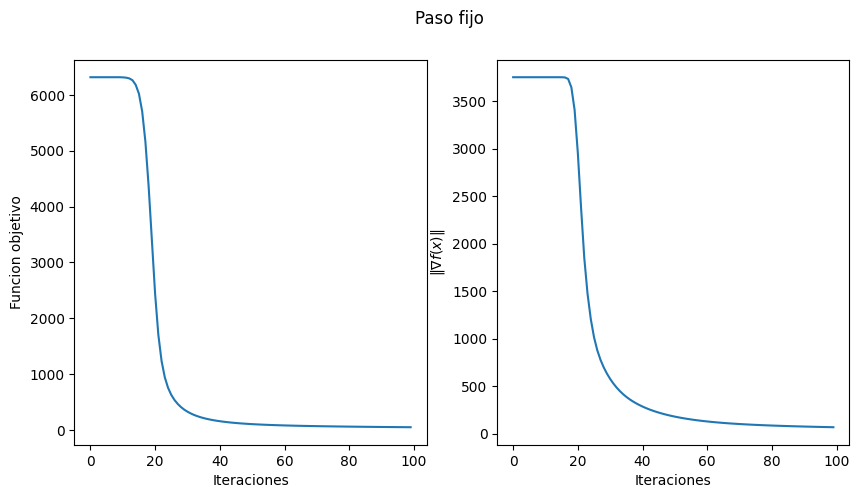

In [143]:
print("Error del algoritmo: ", error(X_sample, x))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(convergence[0])
ax[0].set_xlabel("Iteraciones")
ax[0].set_ylabel("Funcion objetivo")
ax[1].plot(convergence[1])
ax[1].set_xlabel("Iteraciones")
ax[1].set_ylabel(r"$\| \nabla f(x) \|$")

fig.suptitle("Paso fijo")
plt.show()

# Paso inexacto

In [ ]:
def backtracking_alpha(f, grad, beta, X, c=1e-4, rho=0.9, alpha=1):
    g = grad(X, beta)
    while f(X, beta - alpha*g) > f(X, beta) - c*alpha*g.T@g:
        alpha *= rho
    return alpha


def backtracking_steepest_descent(f, grad, beta, X, alpha=1e-4, tol=1e-6, maxiter=200):
    '''
        f: funcion a minimizar,
        grad: gradiente de la funcion a minimizar,
        beta: punto inicial,
        alpha: valor inicial del tamano de paso,
        tol: tolerancia,
        maxiter: maximo de iteraciones
    '''
    
    convergence = [[],[]]

    xk = beta # Punto inicial

    for k in range(maxiter):
        fk = f(X, xk)
        gk = grad(X, xk)
        g_norm = np.linalg.norm(gk)
        
        convergence[0].append(fk)
        convergence[1].append(np.abs(g_norm))
        
        # actualizacion de alpha
        alpha = backtracking_alpha(f, grad, xk, X)
        
        # calculo de proxima iteracion de la solucion
        x = xk - alpha*gk
        if np.linalg.norm(grad(X, x)) < tol: # evaluacion de condicion de paro
            return x, convergence
        # actualizacion de funcion y punto propuesto
        prev_f = f(X, x)
        xk = x

    return xk, convergence

In [145]:
x, convergence = backtracking_steepest_descent(h, grad_h, beta, X_sample, maxiter=100)

Error del algoritmo:  0.001


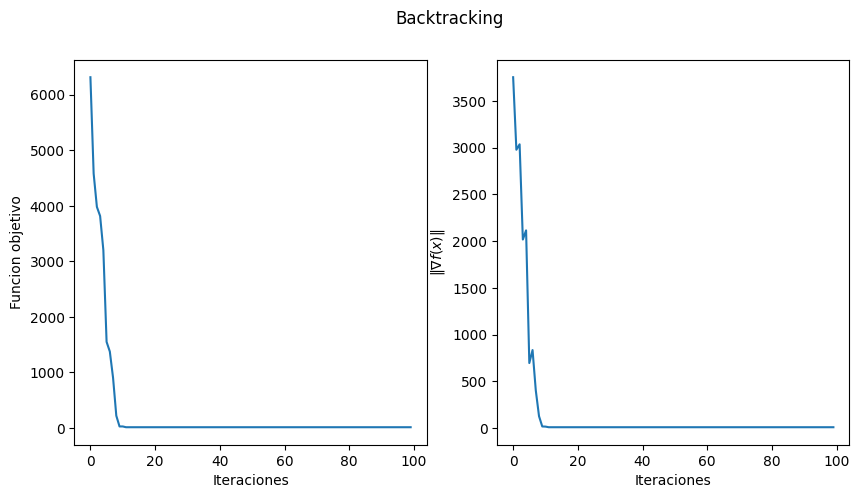

In [146]:
print("Error del algoritmo: ", error(X_sample, x))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(convergence[0])
ax[0].set_xlabel("Iteraciones")
ax[0].set_ylabel("Funcion objetivo")
ax[1].plot(convergence[1])
ax[1].set_xlabel("Iteraciones")
ax[1].set_ylabel(r"$\| \nabla f(x) \|$")

fig.suptitle("Backtracking")
plt.show()